In [278]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
from scipy.optimize import minimize, fmin
from astropy.wcs import WCS

In [4]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)

In [24]:
star.premade = False
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400
time = sc.time[sq][start:end].value
tpfs = sc.flux[sq][start:end].value
errs = sc.flux_err[sq][start:end].value
bkgs = sc.flux_bkg[sq,0,0][start:end].value
bkg0 = np.mean(bkgs)
data = eleanor.TargetData(
    star, 
    height=13, 
    width=13, 
    do_pca=True, 
    do_psf=False,
    time_arr=time, 
    data_arr=tpfs, 
    err_arr=errs, 
    bkg_arr=bkgs, 
)
photometry_flux = sc.to_lightcurve().flux[sq][start:end]

In [315]:
data.psf_lightcurve(flux_arr=photometry_flux.value, model_name='Gaussian', bkg_mag_cutoff=10, verbose=True)

100%|██████████| 18/18 [00:02<00:00,  7.52it/s]
8564677334040.1
8992759797487.62
8992760290048.676
8777384543955.199
8564676784045.843
8354636986608.841
8147265884448.852
7740526490840.018
7673773956017.974
7150426635497.79
6959062103255.506
6220284882172.152
5809045510825.338
4714111753592.6045
4458905053290.653
3166704190327.381
2645754204037.8223
1254270823607.939
830820685413.3657
192174138102.78586
286383057125.5715
1783762543519.6348
456803642024.05536
2747299129658.018
330913333427.5656
482901361284.5802
254587111845.96393
777288898536.2766
199262995870.65094
224141433982.84134
361511596207.2787
198678547963.88913
230416435854.29706
198836126671.74606
202825601777.02374
192966105909.6054
209756168895.9577
192331613428.55133
204324887148.78113
192648058802.26993
195200925468.71118
191586359739.2031
193590016123.9291
191602211799.966
193882953762.04153
191491484578.90866
192599873212.7791
191532438558.51468
191925895709.15356
191407035966.59253
191746601149.02655
191414417012.8558

AttributeError: 'numpy.ndarray' object has no attribute 'fun'

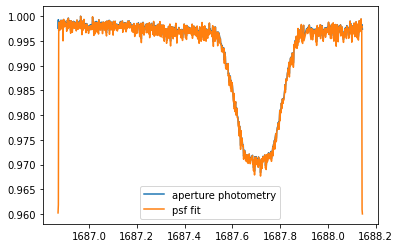

In [317]:
plt.plot(time, photometry_flux / np.max(photometry_flux), label='aperture photometry')
plt.plot(time, data.psf_flux[:end-start] / np.max(data.psf_flux[:end-start]), label='psf fit')
plt.legend()
plt.show()

In [318]:
data.psf_params, data.arma_res

(array([-3.38292992e-02, -2.17440069e-02,  6.77519966e-01, -5.02917728e-05,
         7.24517936e-01]),
  final_simplex: (array([[-1.44275391,  1.21318923,  3.18097131, -1.25970314, -1.57173522,
         -0.83987749,  2.47843914],
        [-1.44275391,  1.21318923,  3.18097131, -1.25970314, -1.57173522,
         -0.83987749,  2.47843914],
        [-1.44275391,  1.21318923,  3.18097131, -1.25970314, -1.57173522,
         -0.83987749,  2.47843914],
        [-1.44275391,  1.21318923,  3.18097131, -1.25970314, -1.57173522,
         -0.83987749,  2.47843914],
        [-1.44275391,  1.21318923,  3.18097131, -1.25970314, -1.57173522,
         -0.83987749,  2.47843914],
        [-1.44275391,  1.21318923,  3.18097131, -1.25970314, -1.57173522,
         -0.83987749,  2.47843914],
        [-1.44275391,  1.21318923,  3.18097131, -1.25970314, -1.57173522,
         -0.83987749,  2.47843914],
        [-1.44275391,  1.21318923,  3.18097131, -1.25970314, -1.57173522,
         -0.83987749,  2.47843914]])